In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  StandardScaler

from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import model_selection
#import seaborn for statistical plots
import seaborn as sns
#to enable plotting graph in jupter notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn.model_selection import GridSearchCV

In [2]:
#colnames=['cultivt','alcoh','mal.acid','ash','acl','magns','phenol','flavonoids','non_flavono','Proanth','Color.int','Hue','OD','Proline']

In [3]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
data = pd.read_csv("diabetics_pima.csv",names=colnames)
data.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.isnull().sum()

preg       0
glu        0
bp         0
sft        0
ins        0
bmi        0
dpf        0
age        0
outcome    0
dtype: int64

C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


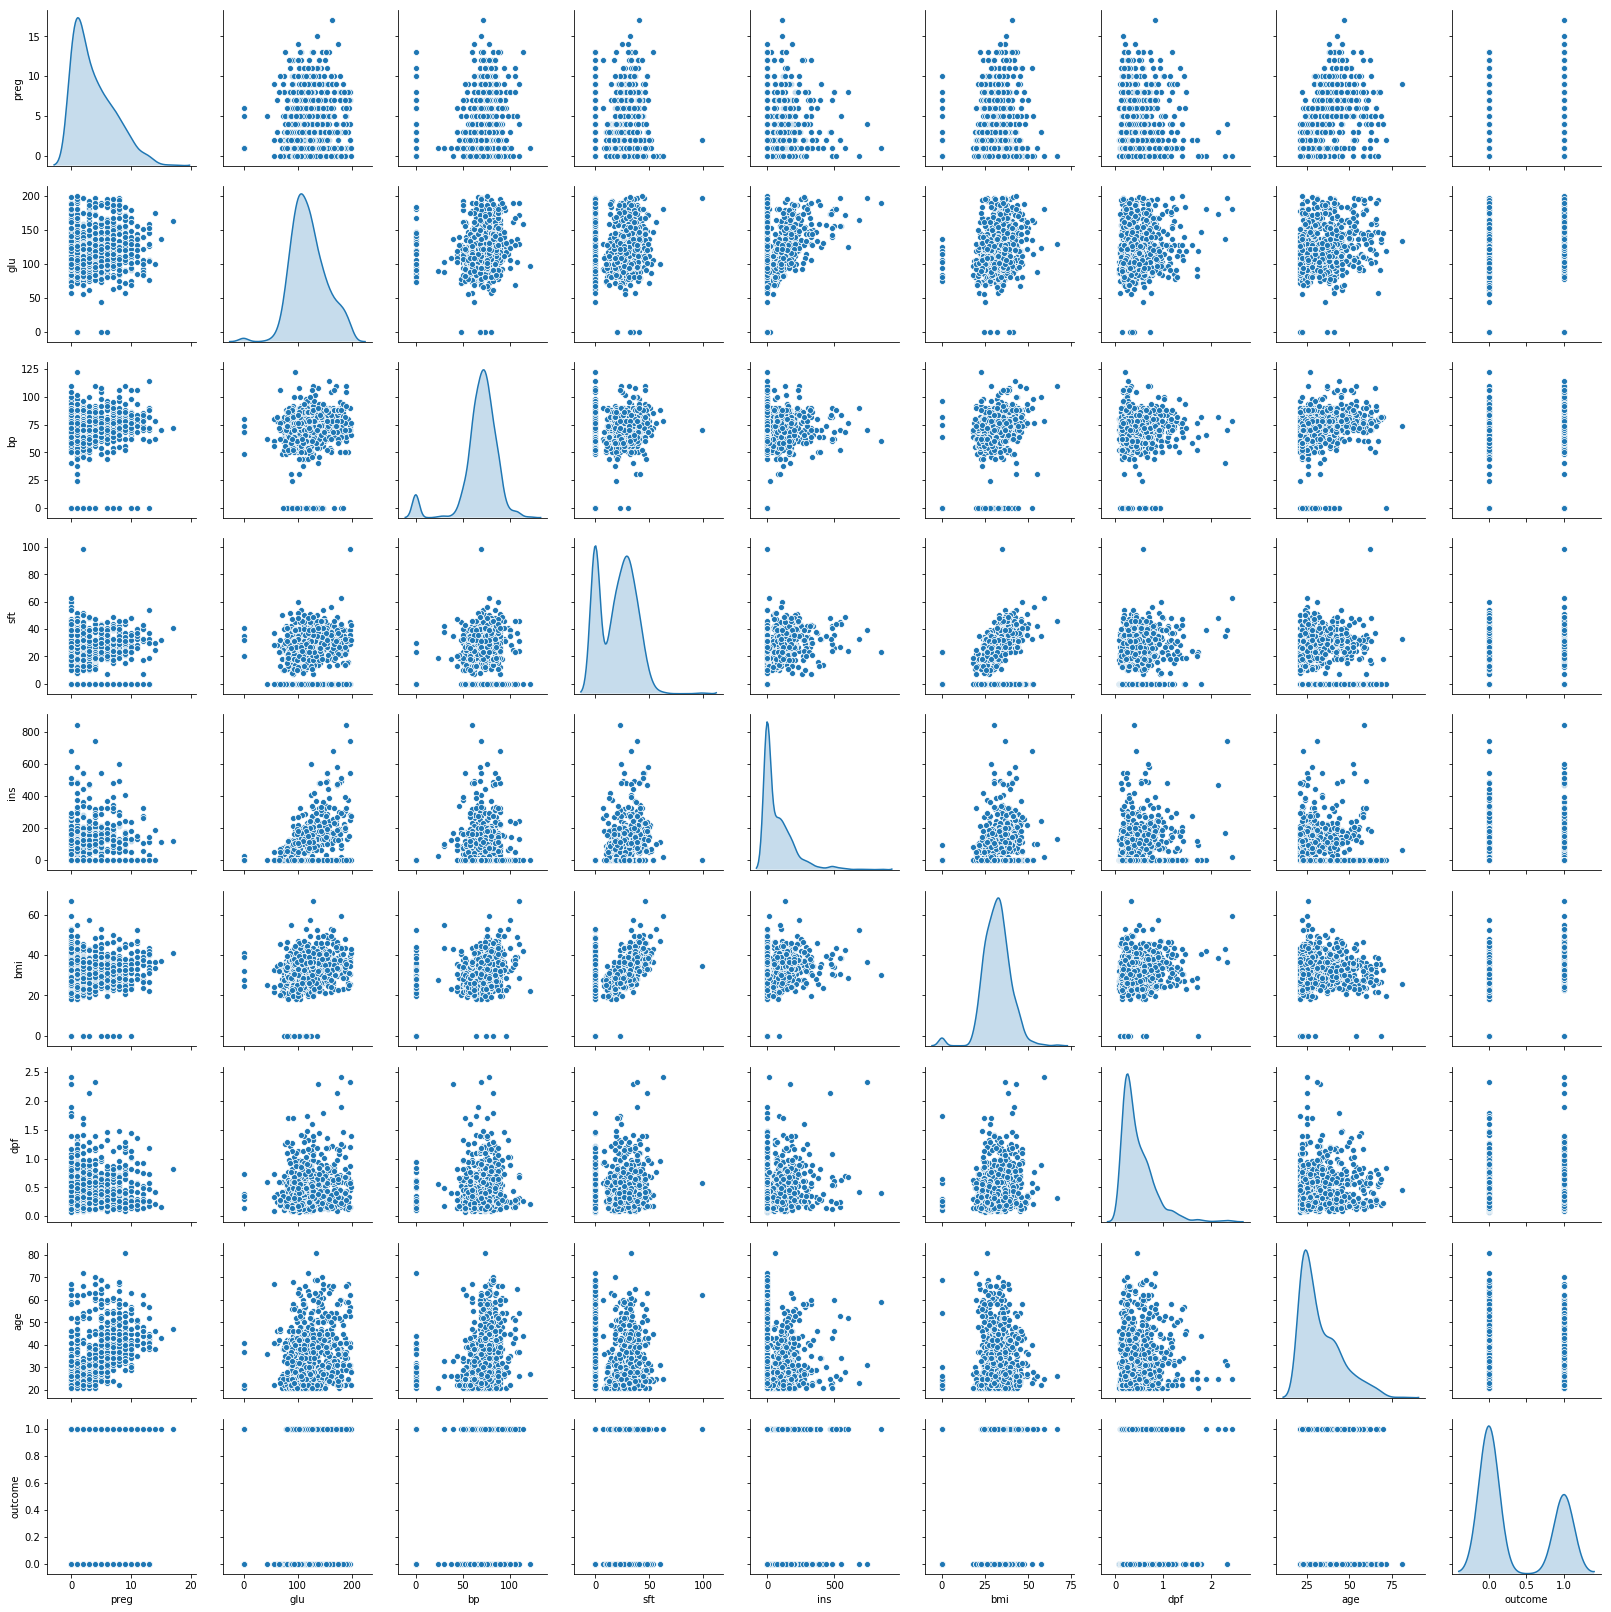

In [7]:
sns.pairplot(data,diag_kind='kde')
plt.show()

In [8]:
#data.cultivt.value_counts()

In [9]:
x=data.drop('outcome',axis=1)
y=data['outcome']
x_std=StandardScaler().fit_transform(x)
x.head()

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,preg,glu,bp,sft,ins,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
type(x_std)

numpy.ndarray

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=2)


In [32]:
type(x_train)

numpy.ndarray

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [12]:
model_df=DecisionTreeClassifier(criterion='entropy')#gives the best feature #selected attributes
model_df.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
model_rf=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3)
model_rf.fit(x_train,y_train)#collection decision tree is call random forest
# it take the sqrt root of total no of features  and using the that no of features to have the different attributes

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
params={'n_neighbors':np.arange(1,10)}
knn=KNeighborsRegressor()
GS=GridSearchCV(knn,params,cv=5)
GS.fit(x,y)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
GS.best_params_

{'n_neighbors': 9}

In [16]:
y_pred=model_df.predict(x_test)
y_pre=model_rf.predict(x_test)

In [17]:
acc=metrics.accuracy_score(y_test,y_pred)
print(acc)
acc_rf=metrics.accuracy_score(y_test,y_pre)
print(acc_rf)

0.658008658008658
0.7705627705627706


In [18]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
cm_rf=metrics.confusion_matrix(y_test,y_pre)
print(cm_rf)

[[120  35]
 [ 44  32]]
[[145  10]
 [ 43  33]]


In [19]:
class_report=metrics.classification_report(y_test,y_pred)
print(class_report)
class_rep=metrics.classification_report(y_test,y_pre)
print(class_rep)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       155
           1       0.48      0.42      0.45        76

   micro avg       0.66      0.66      0.66       231
   macro avg       0.60      0.60      0.60       231
weighted avg       0.65      0.66      0.65       231

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       155
           1       0.77      0.43      0.55        76

   micro avg       0.77      0.77      0.77       231
   macro avg       0.77      0.68      0.70       231
weighted avg       0.77      0.77      0.75       231



In [20]:
models=[]
models.append(('DecisionTree',model_df))
models.append(('RandomForest',model_rf))
#print(models)

In [21]:
#evaluate each model in turn
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s:%f(%f)'%(name,cv_results.mean(),cv_results.std())
    print(msg)

DecisionTree:0.674510(0.029367)
RandomForest:0.755292(0.041651)


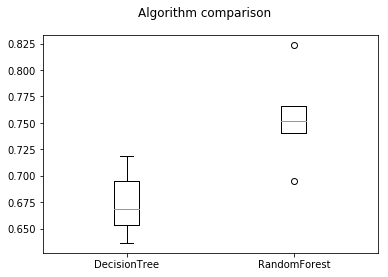

In [22]:
fig=plt.figure()
fig.suptitle('Algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
results

[array([0.66883117, 0.63636364, 0.69480519, 0.71895425, 0.65359477]),
 array([0.74025974, 0.69480519, 0.76623377, 0.82352941, 0.75163399])]

In [24]:
#perform grid search to find the optimal max_depth_size
params={'max_depth':np.arange(1,10)}

GS=GridSearchCV(model,params,cv=3)
GS.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
GS.best_params_

{'max_depth': 4}

In [26]:
pred_train_proba=model_df.predict_proba(x_train)
pred_test_proba=model_df.predict_proba(x_test)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

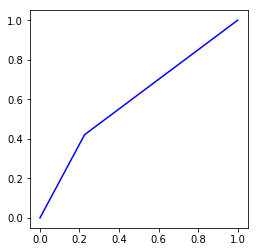

In [27]:
fpr,tpr,thershold=metrics.roc_curve(y_test,pred_test_proba[:,1])
plt.plot(fpr,tpr,label='ROC curve',color='b')
plt.axes().set_aspect('equal')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

In [35]:
print(pd.DataFrame(model_df.feature_importances_,columns=['Imp'],index=x.columns))

           Imp
preg  0.102715
glu   0.245968
bp    0.106333
sft   0.036022
ins   0.051611
bmi   0.207013
dpf   0.153123
age   0.097215


In [36]:
train_char_labels=['1','2','3']
wine_Tree_File=open('wine_tree.dot','w')
dot_data=tree.export_graphviz(model,out_file=wine_Tree_File,feature_names=list(x_train),class_names=list(train_char_labels))
wine_Tree_File.close()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
from IPython.display import Image
system("dot -Tpng wine_tree.dot -o wine_tree.png")   # This command is to the OS
Image("wine_tree.png") 